# Plotting Data with Different Units


In the previous lesson, we wanted to explore Covid cases by state, but our previous data did not provide sufficient detail. We will start this lesson with a different data set for our analysis. Our goal will be to visualize both cases and deaths on one plot for a given state.

## Kaggle: US County JHU Data
Download the covid_us_county.csv from Kaggle and upload it to your Jupyter notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

In [2]:
df = pd.read_csv("/Users/danielbarella/Downloads/covid_us_county.csv")
display(df.head())
#df.info

/var/folders/l7/w6kg6nmd3dgfd2wj06wwdb1c0000gn/T/ipykernel_55725/264566318.py:1: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/danielbarella/Downloads/covid_us_county.csv")


,fips,county,state,lat,long,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,...,2/19/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,18961,18961,18961,19205,19205,...,19686,19732,19732,19732,19732,19732,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,18961,18961,18961,19205,19205,...,19686,19732,19732,19732,19732,19732,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,18961,18961,18961,19205,19205,...,19686,19732,19732,19732,19732,19732,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,18961,18961,18961,19205,19205,...,19686,19732,19732,19732,19732,19732,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,18961,18961,18961,19205,19205,...,19686,19732,19732,19732,19732,19732,2020-01-26,0,AL,0


<bound method DataFrame.info of             fips   county    state        lat        long  1/1/23  1/2/23  \
0         1001.0  Autauga  Alabama  32.539527  -86.644082   18961   18961   
1         1001.0  Autauga  Alabama  32.539527  -86.644082   18961   18961   
2         1001.0  Autauga  Alabama  32.539527  -86.644082   18961   18961   
3         1001.0  Autauga  Alabama  32.539527  -86.644082   18961   18961   
4         1001.0  Autauga  Alabama  32.539527  -86.644082   18961   18961   
...          ...      ...      ...        ...         ...     ...     ...   
3612697  56045.0   Weston  Wyoming  43.839612 -104.567488    1880    1880   
3612698  56045.0   Weston  Wyoming  43.839612 -104.567488    1880    1880   
3612699  56045.0   Weston  Wyoming  43.839612 -104.567488    1880    1880   
3612700  56045.0   Weston  Wyoming  43.839612 -104.567488    1880    1880   
3612701  56045.0   Weston  Wyoming  43.839612 -104.567488    1880    1880   

         1/3/23  1/4/23  1/5/23  ...  2/19/

In [3]:
df.columns


Index(['fips', 'county', 'state', 'lat', 'long', '1/1/23', '1/2/23', '1/3/23',
       '1/4/23', '1/5/23', '1/6/23', '1/7/23', '1/8/23', '1/9/23', '1/10/23',
       '1/11/23', '1/12/23', '1/13/23', '1/14/23', '1/15/23', '1/16/23',
       '1/17/23', '1/18/23', '1/19/23', '1/23/23', '1/24/23', '1/25/23',
       '1/26/23', '1/27/23', '1/28/23', '1/29/23', '1/30/23', '1/31/23',
       '2/1/23', '2/2/23', '2/3/23', '2/4/23', '2/5/23', '2/6/23', '2/7/23',
       '2/8/23', '2/9/23', '2/10/23', '2/11/23', '2/12/23', '2/13/23',
       '2/14/23', '2/15/23', '2/16/23', '2/17/23', '2/18/23', '2/19/23',
       '2/23/23', '2/24/23', '2/25/23', '2/26/23', '2/27/23', 'date', 'cases',
       'state_code', 'deaths'],
      dtype='object')

In [4]:
df['state_code'].unique()

array(['AL', 'AK', nan, 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

Why is there a null value (nan) in state_code?


In [5]:
## checking rows missing state_code
check = df[df['state_code'].isna()]
check

,fips,county,state,lat,long,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,...,2/19/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,date,cases,state_code,deaths
110262,60.0,NaN,American Samoa,-14.2710,-170.1320,8266,8266,8266,8266,8285,...,8320,8320,8320,8320,8320,8320,2020-01-22,0,NaN,0
110263,60.0,NaN,American Samoa,-14.2710,-170.1320,8266,8266,8266,8266,8285,...,8320,8320,8320,8320,8320,8320,2020-01-23,0,NaN,0
110264,60.0,NaN,American Samoa,-14.2710,-170.1320,8266,8266,8266,8266,8285,...,8320,8320,8320,8320,8320,8320,2020-01-24,0,NaN,0
110265,60.0,NaN,American Samoa,-14.2710,-170.1320,8266,8266,8266,8266,8285,...,8320,8320,8320,8320,8320,8320,2020-01-25,0,NaN,0
110266,60.0,NaN,American Samoa,-14.2710,-170.1320,8266,8266,8266,8266,8285,...,8320,8320,8320,8320,8320,8320,2020-01-26,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253805,78.0,NaN,Virgin Islands,18.3358,-64.8963,23781,23781,23781,23820,23831,...,24705,24756,24757,24757,24757,24764,2022-12-29,23769,NaN,127
3253806,78.0,NaN,Virgin Islands,18.3358,-64.8963,23781,23781,23781,23820,23831,...,24705,24756,24757,24757,24757,24764,2022-12-30,23781,NaN,127
3253807,78.0,NaN,Virgin Islands,18.3358,-64.8963,23781,23781,23781,23820,23831,...,24705,24756,24757,24757,24757,24764,2022-12-31,23781,NaN,127
3253808,78.0,NaN,Virgin Islands,18.3358,-64.8963,23781,23781,23781,23820,23831,...,24705,24756,24757,24757,24757,24764,2023-01-22,24269,NaN,129


In [6]:
check['state'].unique()

array(['American Samoa', 'Diamond Princess', 'District of Columbia',
       'Grand Princess', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Virgin Islands'], dtype=object)

Ah, OK. There are several territories owned by the US that are not technically a state and therefore do not have a 2-letter state code.
Let's add a state code for:
American Somoa (AS)
the District of Columbia (DC)
Guam (GU)
Northern Mariana Islands (MP)
Puerto Rico" (PR)
Virgin Islands (VI)
Also, it looks like cases from several cruise ships were listed (Diamond Princess and Grand Princess). Let's summarize these into one code for "cruise"
Diamond Princess or Grand Princess (CR)

In [7]:
df.loc[ df['state']== 'American Samoa', 'state_code'] = "AS"
df.loc[ df['state']=='District of Columbia', 'state_code'] = "DC"
df.loc[ df['state']== 'Guam', 'state_code'] = "GU"
df.loc[ df['state']== 'Northern Mariana Islands ', 'state_code'] = "MP"
df.loc[ df['state']=='Puerto Rico', 'state_code'] = "PR"
df.loc[ df['state']=='Virgin Islands', 'state_code'] = "VI"
df.loc[ (df['state']=='Diamond Princess') | (df['state']=='Grand Princess'), 'state_code'] = "CR"
## confirming DC is in the state_code column
df['state_code'].unique()

array(['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'CR', 'DC',
       'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
       'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NM', 'NY', 'NC', 'ND', nan, 'OH', 'OK', 'OR', 'PA', 'PR',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV',
       'WI', 'WY'], dtype=object)

### Prepare Datetime Index
We will convert our 'date' column to datetime and set this column as our index.

In [10]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df

TypeError: 'method' object is not subscriptable

## Visualizing Time Series with Different Magnitudes
First, we will drop columns that are not needed:

In [11]:
# drop unneeded columns
df = df.drop(columns=['fips','lat','long'])

AttributeError: 'function' object has no attribute 'drop'

Now we will resample with daily frequency and we will group our county data together by state_code. We will aggregate our data with .sum() to get the total number of cases per state each day.

In [12]:
## resample as daily freq by state
df_ts = df.groupby("state_code").resample("D").sum()
df_ts

AttributeError: 'function' object has no attribute 'groupby'

Now let's explore one state. We will start with New York (NY). We would like to visualize BOTH cases and deaths on the same figure. Here is a starting point:

In [13]:
state_ts = df_ts.loc['NY'].copy()
ax = state_ts.plot();

NameError: name 'df_ts' is not defined

As we can see, this makes it much more difficult to read the # of cases for deaths, since they are much lower than the # of cases.
We can use twin axes to plot the deaths on the right y-axis so that it can be scaled differently to allow us to see the changes.
## Using twin axes
To use twin axes, we first make our fig and ax. The best way is using plt.subplots()

Once we have our ax, we will save a new ax from ax.twinx()
We will use our ax

NameError: name 'state_ts' is not defined

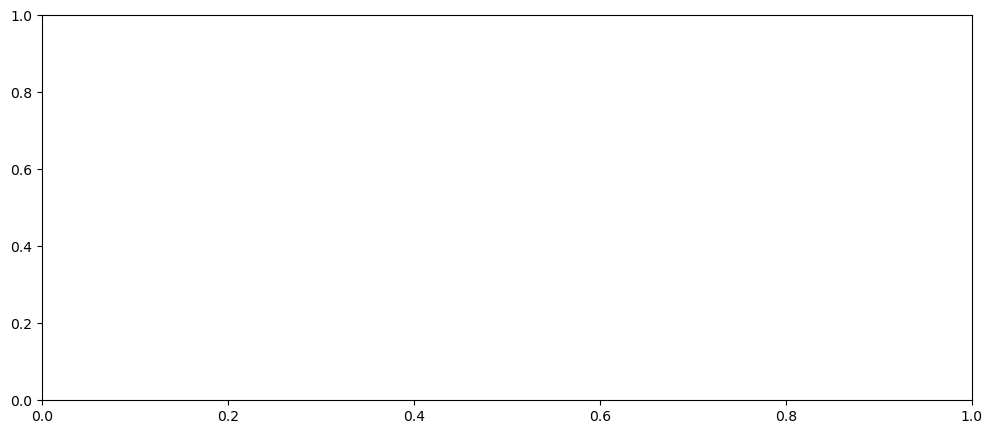

In [14]:
fig, ax1 = plt.subplots(figsize=(12,5))
## Plot first line on original ax
ax1.plot(state_ts.index, state_ts['cases'] ,color='#3b81db',label='Cases')
# Make twin axis and plot second line
ax2 = ax1.twinx()
ax2.plot(state_ts.index ,state_ts['deaths'],label='Deaths',color='orange')


Now you can see that different scales are being used for the cases and the deaths. Notice the discrepancy between the y-axis labels for cases (0 to 6e^6) and deaths (0 to 70,000). The deaths line(orange line) is no longer flat so we are able to see the cumulative increase in deaths over time. This visual still needs some work. Let's improve it by adding a legend.

### Adding a legend to twin axis

Once we have used 2 axes in 1 graph, legends start to become more difficult to use. The last legend displayed (ax1 vs ax2) will obscure the second one. There is a workaround for this, which is adapted from this original Source.

We must manually reconstruct a legend by giving ax1.legend() the lines and labels for the lines.
We can get the lines using: lines = ax1.get_lines() + ax2.get_lines() to get the lines themselves.
We can get labels using: labels = [l.get_label() for l in lines]
We can then use ax1.legend(lines, labels) to add the legend.
Note: it doesn't matter which of the 2 axes you use for ax1.legend().

NameError: name 'state_ts' is not defined

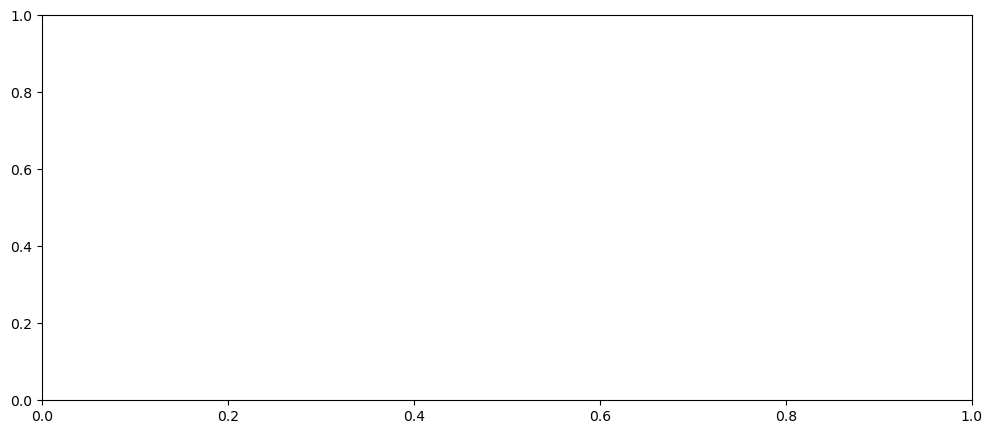

In [15]:
# Solution for having two legends
# Source: https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(state_ts.index, state_ts['cases'] ,color='#3b81db',label='Cases')
ax1.set_ylabel("# of Total Cases")
# Make twin axis
ax2 = ax1.twinx()
ax2.plot(state_ts.index ,state_ts['deaths'],label='Deaths',color='orange')
ax2.set_ylabel("# of Total Deaths")
## Removing the grids
ax1.grid(False)
ax2.grid(False)
## Making joined legend
lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc=0);
fig.autofmt_xdate()

The legend is necessary and looks great! Now we can customize the formatting of large tick values in a very similar fashion as we formatted date ticks.

Before we add more customization, let's wrap our progress so far in a function:

# def plot_compare_cols(state_ts,col1='cases',color1='#3b81db',
                      col2='deaths',color2='orange',
                     ylabel1="# of Total Cases", ylabel2="# of Total Deaths",
                     figsize=(12,5)):

In [16]:
def plot_compare_cols(state_ts,col1='cases',color1='#3b81db',
                      col2='deaths',color2='orange',
                     ylabel1="# of Total Cases", ylabel2="# of Total Deaths",
                     figsize=(12,5)):
    """#Solution for having two legends
    # Source: https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a
    """
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.plot(state_ts.index, state_ts[col1] ,color=color1,label=col1.title())
    ax1.set_ylabel(ylabel1)
    # Make twin axis
    ax2 = ax1.twinx()
    ax2.plot(state_ts.index ,state_ts[col2],label=col2.title(),color=color2)
    ax2.set_ylabel(ylabel2)
    ## Removing the grids
    ax1.grid(False)
    ax2.grid(False)
    ## Making joined legend
    lines = ax1.get_lines() + ax2.get_lines()
    labels = [l.get_label() for l in lines]
    ax2.legend(lines, labels, loc=0);
    fig.autofmt_xdate()
    return fig, (ax1,ax2)

Now let's test our function on the New York data:



In [17]:
fig,(ax1,ax2) = plot_compare_cols(state_ts)


NameError: name 'state_ts' is not defined

## Formatting Non-Date Ticks Using matplotlib.ticker
We previously introduced the matplotlib.dates module (which we called mdates).

There are also tick formatters/locators for non-date ticks in matplotlib.ticker
## Tick Formatting - Large #'s
In the figure above, we can see that the y-axis is using scientific notation (notice the 1e6 at the top of the left y-axis).

Let's discuss 2 tick formatters that may be appropriate for our use case. - the StrMethodFormatter - the FuncFormatter

In [18]:
import matplotlib.ticker as mticks


Tick Formatters Examples
Tick Locator Examples
## StrMethodFormatter
We will use the StrMethodFormatter which uses Python string format codes to change the tick label text.
We provide a string format that will look very similar to an f-string. Meaning that it will use curly brackets around a string that contains the variable x and a : followed by a format code. However, it won't actually apply the formatting and won't include the f.
Reference: String Format Codes
Let's make our cases ticks look more professional
Add a , separator for thousands
Show 0 decimal places
Tutorial Example

In [19]:
str_fmt = mticks.StrMethodFormatter("{x:,.0f}")
str_fmt

In [20]:
fig,(ax1,ax2) = plot_compare_cols(state_ts)
ax1.yaxis.set_major_formatter(str_fmt)
ax2.yaxis.set_major_formatter(str_fmt)

NameError: name 'state_ts' is not defined

This looks nice, but adds a lot of unnecessary 0's to our y-axis.
What if we wanted to convert our y-axis from the raw # of cases (e.g. 80,000,000) to millions (e.g. 80M)?
For this, we would need a more sophisticated tool - the FuncFormatter.
## Using the FuncFormatter
The function formatter is a little more involved and requires that we create a function that accepts: x (the actual value for the tick), and pos (a value for tracking position - used by matplotlib).
It then must return a string with the desired tick label for each x.
Example: How to use the FuncFormatter to convert raw units to millions with an "M" (e.g. "12M")
To use the Function Formatter:
Create a function that accepts 2 arguments: x and pos.
Calculate whatever modification to x is required.
Use f-strings and format codes to specify how to change x.
e.g. f"{x*1e-6:,}M" would convert "2,000,000" -> "2M"

## Tip: Writing large numbers in python.
While we can write out the large values without any issue with python, it can be hard for a human to read at a glance when there are many 0's with no separator
e.g. 10 million=10000000
You may also know that we can also use scientific notation with python using 1e followed by the number of 0's.
For example:
10 thousand = 1e4
1 million = 1e6
10 million =1e7
One additional trick that you probably DON'T know is that python will let you use an underscore as a separator for large values without it causing any issues.
For example:
10 million: 10_000_000
So when typing large numeric values, try out the approaches above and see what feels most intuitive for you!

# def millions(x,pos):
# def thousands(x,pos):

In [23]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

In [25]:
fig,(ax1,ax2) = plot_compare_cols(state_ts)
## Set the axis' major formatter
ax1.yaxis.set_major_formatter(fmt_mill)
ax2.yaxis.set_major_formatter(fmt_thous)

NameError: name 'state_ts' is not defined

# Combining Our Tick Formatting with Date Formatting


In [26]:
# create the locator to place ticks every 1 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

NameError: name 'mdates' is not defined

In [27]:
final_fig,(ax1,ax2) = plot_compare_cols(state_ts)
ax1.set_xlim(left=pd.to_datetime('01/2020'))
## Set the y-axes major formatters
ax1.yaxis.set_major_formatter(fmt_mill)
ax2.yaxis.set_major_formatter(fmt_thous)
## customize minor ticks
ax1.xaxis.set_minor_locator(loc_3months)
ax1.xaxis.set_minor_formatter(fmt_months)
# ## customize major ticks
ax1.xaxis.set_major_locator(loc_year)
ax1.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually different
ax1.grid(which='minor',axis='x',ls=":",lw=1)
ax1.grid(which='major',axis='x',color='k')
final_fig.autofmt_xdate(which='major',rotation=90,ha='center')



NameError: name 'state_ts' is not defined

# Time Series Stats


## Cumulative Data vs New Data
We will continue to work with our county Covid data that has been grouped by state.

In [29]:
df_ts

NameError: name 'df_ts' is not defined

Let's select 1 feature from 1 state to use for demonstration.
We will use cases from NY, but you should try another state and/or feature!
## Converting Cumulative Values to Delta Values
In the previous lesson, we made a high quality plot for cases and deaths in New York, but let's just pull up a quick plot here to refresh our memory:

In [30]:
## quick visualization
state_code = "NY"
state_ts = df_ts.loc['NY'].copy()
axes = state_ts['cases'].plot(figsize=(12,6),title=f"{state_code} State")

NameError: name 'df_ts' is not defined

We can see above that our time series always increases. The Covid data is actually the cumulative number of cases.

What if we wanted to visualize just the NEW cases?
### .diff()
We can use ts.diff(), which will subtract the previous row from the next row, turning our cumulative data into New Daily Cases.
It calculates the DIFFERENCE between each row and the prior row by default (to calculate the difference between other # of rows, you can use the periods argument.)
This will create 1 null value at the beginning of the time series since there is no prior row to subtract.

In [31]:
ts_diff = state_ts.diff()
ts_diff

NameError: name 'state_ts' is not defined

Now let's take a look at the plot:

In [32]:
ax = ts_diff['cases'].plot(title='# of Cases - Differenced')


NameError: name 'ts_diff' is not defined

Ah, now that looks much more informative, in terms of the day-to-day changes in case counts.
It looks pretty jagged though. Did we do something wrong?
No! Time series will often have random fluctuations that can make it difficult to see the big-picture.
Most of the visuals of Covid data that you've seen in the news have likely been moving averages, which smooths out the day-to-day fluctuations.
## Cumulative Sum (.cumsum()) is the Inverse of .diff()
Additionally, if we start with day-to-day data, we can do the opposite manipulation. We can convert new values/delta values into a cumulative total by using .cumsum()
This will take us back to where we started with this data set, but we will demo the process below:

In [33]:
ts_sum = ts_diff.cumsum()
ax = ts_sum['cases'].plot(title='Cumulative Sum vs Original Data',
                          label='Summed Diff Data',color='black',lw=5)
state_ts['cases'].plot(ax=ax,label='Original Data',color='red',lw=2,ls='--')
ax.legend();

NameError: name 'ts_diff' is not defined

As we can see in the figure above, summing the differenced data produces the same cumulative values that we originally had.
## Rolling Statistics
To help us see what is happening, we will select a smaller time period. We will limit our data to Oct 2021 through July 2022.

In [34]:
## selecting a single feature and smaller time period for demonstration
ts = ts_diff.loc['10/2021':'7/2022','cases'].copy().dropna()
ts.plot();

NameError: name 'ts_diff' is not defined

Like .resample(), pandas has a .rolling() method, which is designed for calculating rolling statistics across a fixed window size.
It accepts a window size (how many rows/time steps should be averaged together).
It also requires some form of aggregation to produce the final data.
Let's try calculating the 7-day moving average for our ts.

In [35]:
window = 7
ts_mean = ts.rolling(window).mean()
ts_mean

NameError: name 'ts' is not defined

By calculating a rolling mean, notice we have created null values for the first 7 rows (the window size).
Now let's compare the plot of our raw daily counts with our 7-day moving average.

In [36]:
ax = ts.plot(label='Raw Daily Counts',lw=1)
ts_mean.plot(label=f'{window} Day Moving Average',ax=ax,lw=3)
ax.legend();

NameError: name 'ts' is not defined

While definitely not perfectly smooth, taking the 7-day moving average has made it easier to see the big-picture trend without getting distracted by the naturally occurring random fluctuations in daily values.

In [37]:
# we can also calculate rolling std()
std = ts.rolling(window).std()
std

NameError: name 'ts' is not defined

Now we will calculate the values within 1 standard deviation of the mean:



In [38]:
## calculating +/- std
ts_stats= pd.DataFrame({'mean':ts_mean,
             'mean+std':ts_mean+std,
             'mean-std':ts_mean-std})
ts_stats = ts_stats.dropna()
ts_stats

NameError: name 'ts_mean' is not defined

In [39]:
## plot the rolling mean +/- the rolling std
ax = ts_stats.plot(y='mean',lw=2)
ts_stats.plot(y='mean+std',color='g',lw=0.5,ax=ax)
ts_stats.plot(y='mean-std',color='g',lw=0.5,ax=ax)

NameError: name 'ts_stats' is not defined

We can use ax.fill_between to fill in the area between two sets of y-values.


In [40]:
## plot the rolling mean +/- the rolling std
ax = ts_stats.plot(y='mean',lw=2)
ax.fill_between(ts_stats.index, ts_stats['mean+std'], ts_stats['mean-std'], color='limegreen', alpha=0.5,zorder=0,label="mean+/-std");
ax.legend();

NameError: name 'ts_stats' is not defined

# Normalizing Time Series


In the previous lesson, we created visuals for New York State. While those were informative, we now want to compare Covid cases in New York to another state.

## Normalizing Time Series
First, let's define the cases in NY and the cases in KY:

In [41]:
#Define each state's cases
ny_cases = df_ts.loc["NY",'cases']
ky_cases = df_ts.loc['KY','cases']

NameError: name 'df_ts' is not defined

Now, let's create a DataFrame with each state's cases as a column:



In [42]:
compare_ts = pd.DataFrame({'KY':ky_cases,
                          "NY":ny_cases})

NameError: name 'ky_cases' is not defined

In [43]:
compare_ts.plot();

NameError: name 'compare_ts' is not defined

Comparing Kentucky and New York cumulative cases makes it look like NY is ~3-4 times worse off than Kentucky.
But is this a fair conclusion?
Let's examine the differenced # of cases and see if changing to non-cumulative values makes a difference.

In [44]:
compare_diff = compare_ts.diff().dropna()
compare_diff

NameError: name 'compare_ts' is not defined

In [45]:
compare_diff.plot();


NameError: name 'compare_diff' is not defined

New York still has many more cases than Kentucky. But, considering the difference in population, does it makes sense that NY would have higher values?
What if we normalized the daily case counts so that we visualize the percent change from the previous day (instead of the raw # of cases)?
Pandas has a .pct_change() method that will calculate this for us!
## ts.pct_change()

In [46]:
compare_pct = compare_ts.pct_change(freq='D')
compare_pct

NameError: name 'compare_ts' is not defined

Note: the name pct_change is slightly misleading, as we do not get the actual %'s but the ratio out of 1.
Multiple by 100 to get the actual percentage value.

In [47]:
compare_pct = compare_ts.pct_change(freq='D')*100
compare_pct

NameError: name 'compare_ts' is not defined

It makes sense that there would be some giant spikes in the percent change early in the pandemic. Let's cut out the earliest data from our visualization.

In [48]:
plot_ts = compare_pct.loc['07/2021':]
plot_ts

NameError: name 'compare_pct' is not defined

In [49]:
ax = plot_ts.plot(title='% Change in Cases',ylabel='%')


NameError: name 'plot_ts' is not defined

Taking a rolling mean for visibility and compare against our original data.


In [50]:
compare_ts.loc['07/2021':].plot(title='Original Data - Cumulative Counts');


NameError: name 'compare_ts' is not defined

In [51]:
ax = plot_ts.plot(title='% Change in Cases',ylabel='%')


NameError: name 'plot_ts' is not defined

Taking a rolling mean for visibility and compare against our original data.


In [52]:
compare_ts.loc['07/2021':].plot(title='Original Data - Cumulative Counts');



NameError: name 'compare_ts' is not defined

In [53]:
compare_diff.loc['07/2021':].rolling(7).mean().plot(title='New Cases');



NameError: name 'compare_diff' is not defined

In [54]:
plot_ts = compare_pct.loc['07/2021':].rolling(window).mean()
plot_ts.plot(title='% Change - 7 Day Moving Average');

NameError: name 'compare_pct' is not defined

Now that is a much more fair comparison! Here we can see that while NY had a higher percentage change vs KY at some points, there were also times when KY had a higher % change.
## Normalizing by Population
Let's try normalizing the case counts using the state population.
A popular approach to this is to normalize the values to per 100,000 people (instead of per person))
Since our Covid dataset does not include population, we will have to obtain this from another data set and merge it with our Covid data.
We will use a Census dataset from Kaggle: 2019 Census US Population Data

In [55]:
us_pop = pd.read_csv('YOUR PATH')
us_pop.head()

FileNotFoundError: [Errno 2] No such file or directory: 'YOUR PATH'

- In order to match the state population with the right abbreviation for the state, we need to either return to our original raw data and extract the mapping of Statename:state code OR we could acquire another file that has this information already paired.

In [56]:
state_lookup = df[['state','state_code']]
state_lookup = state_lookup.drop_duplicates(subset=['state']).reset_index(drop=True)
state_lookup.head()

TypeError: 'method' object is not subscriptable

In [57]:
## merging the us pop with our state lookup
merged_pop = pd.merge(us_pop[['STATE','POPESTIMATE2019']], state_lookup, left_on='STATE', right_on='state')
# merged_pop = merged_pop.drop(columns='state').set_index('state_code')
state_pop = merged_pop.set_index('state_code')['POPESTIMATE2019']
state_pop.head()

NameError: name 'us_pop' is not defined

In [58]:
## example calc for KY
compare_ts['KY']/state_pop.loc['KY']*100_000

NameError: name 'compare_ts' is not defined

- Now let's use a for loop to calculate the population


In [60]:
## preparing all columns using loop
compare_pop = compare_ts.copy()
for col in compare_ts.columns:
    compare_pop[col] =( compare_pop[col] / state_pop.loc[col])*100_000
compare_pop

NameError: name 'compare_ts' is not defined

In [61]:
ax = compare_pop.plot(ylabel='Population-Adj. Cases',title='# of Cases Per 100K People');
ax.yaxis.set_major_formatter(str_fmt)

NameError: name 'compare_pop' is not defined

- Fascinating! Once we control for population, we can see that Kentucky generally had a HIGHER cumulative number of Covid cases per 100,000 people.